In [1]:
#This is the first script for add_electricity local: it is the most basic one

In [2]:
import pypsa
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
n=pypsa.Network()

#Snapshots
n.set_snapshots(value=pd.date_range(freq="h", start="2013-01-01", end="2014-01-01", inclusive='left'))
n.snapshot_weightings[:] *= 8760.0 / n.snapshot_weightings.sum()

c:\Users\denis\miniconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:374: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\denis\miniconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:374: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\denis\miniconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:374: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\denis\miniconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:374: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\denis\miniconda3\envs\pypsa-earth\lib\site-packages\pypsa\components.py:374: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.

c:\Users\denis\miniconda3\envs\pypsa-earth\lib\site-packages

In [3]:
#I create the bus 

n.madd("Bus", ["onebus"], x=0.1, y=0.2, carrier="AC", v_nom=20)

n.buses

,x,y,carrier,v_nom,type,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,sub_network
Bus,,,,,,,,,,,
onebus,0.1,0.2,AC,20.0,,None,1.0,0.0,inf,PQ,


In [4]:
#Generation

with xr.open_dataset(r'C:\Users\denis\OneDrive\Desktop\Mini grids\pypsa-distribution\time_series\Generation_timeseries\profile_solar.nc') as ds:

    solar=ds["profile"].transpose("time", "bus").to_pandas()

#I take just the first column(one bus)

# solar=solar.iloc[:,0:1]
solar=solar.reindex(n.snapshots)

#I connect a generator to the bus "onebus"
buses=range(1)

n.madd("Generator", buses, suffix = ' solar', bus = "onebus", carrier='solar', p_nom_extendable=True, p_nom_max=350, p_nom_min=280, p_max_pu=solar, p_nom=300, p_set=solar,  marginal_cost=0.001, capital_cost=400)


# p_nom=1000,  , carrier="solar",efficiency=0.3, 

       '105 solar', '107 solar', '109 solar', '110 solar', '112 solar',
       ...
       '9 solar', '90 solar', '91 solar', '92 solar', '93 solar', '94 solar',
       '96 solar', '97 solar', '98 solar', '99 solar'],
      dtype='object', name='Generator', length=225) for attribute p_max_pu of Generator are not in main components dataframe generators
       '105 solar', '107 solar', '109 solar', '110 solar', '112 solar',
       ...
       '9 solar', '90 solar', '91 solar', '92 solar', '93 solar', '94 solar',
       '96 solar', '97 solar', '98 solar', '99 solar'],
      dtype='object', name='Generator', length=225) for attribute p_set of Generator are not in main components dataframe generators


Index(['0 solar'], dtype='object')

In [5]:
print(solar)

bus                    0    2    3    5    6    8    9   10   12   13  ...  \
snapshot                                                               ...   
2013-01-01 00:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2013-01-01 01:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2013-01-01 02:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2013-01-01 03:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2013-01-01 04:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
...                  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
2013-12-31 19:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2013-12-31 20:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2013-12-31 21:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2013-12-31 22:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2013-12-31 23:00:00  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [6]:
import pandas as pd
#I import a time series for load as pandas dataframe
load=pd.read_csv(r'C:\Users\denis\OneDrive\Desktop\Mini grids\pypsa-distribution\time_series\Load_timeseries\sample_profile.csv', parse_dates=True)
#Used at first, now changed to make it look similar to solar data
# date_index=pd.date_range('01/01/2013', periods=8760, freq='h')
# date_index = pd.DataFrame(date_index, columns=['time'])
# date_index['bus 0']=load_df['bus 0']
# load=date_index
load=load["bus 0"]
load=pd.DataFrame(load)
load = load.set_index([n.snapshots])
#I create a numpy array 
import numpy as np
load_df=np.array(load)

In [7]:
print(load)

                         bus 0
snapshot                      
2013-01-01 00:00:00  18.559885
2013-01-01 01:00:00  20.595279
2013-01-01 02:00:00  14.449810
2013-01-01 03:00:00  16.499849
2013-01-01 04:00:00  13.390089
...                        ...
2013-12-31 19:00:00  57.438227
2013-12-31 20:00:00  35.517246
2013-12-31 21:00:00  33.213649
2013-12-31 22:00:00  30.535195
2013-12-31 23:00:00  25.422619

[8760 rows x 1 columns]


In [8]:

#I connect the load to the bus "onebus"

n.madd("Load", ["MyLoad"], bus=["onebus"], carrier="AC", p_set = load)


#Not to have the warning: load_df=load["bus 0"] and p_set=load_df
# n.loads

Index(['MyLoad'], dtype='object')

In [23]:
n.loads

,bus,carrier,type,p_set,q_set,sign
Load,,,,,,
MyLoad,onebus,AC,,0.0,0.0,-1.0


<AxesSubplot: xlabel='snapshot', ylabel='MW'>

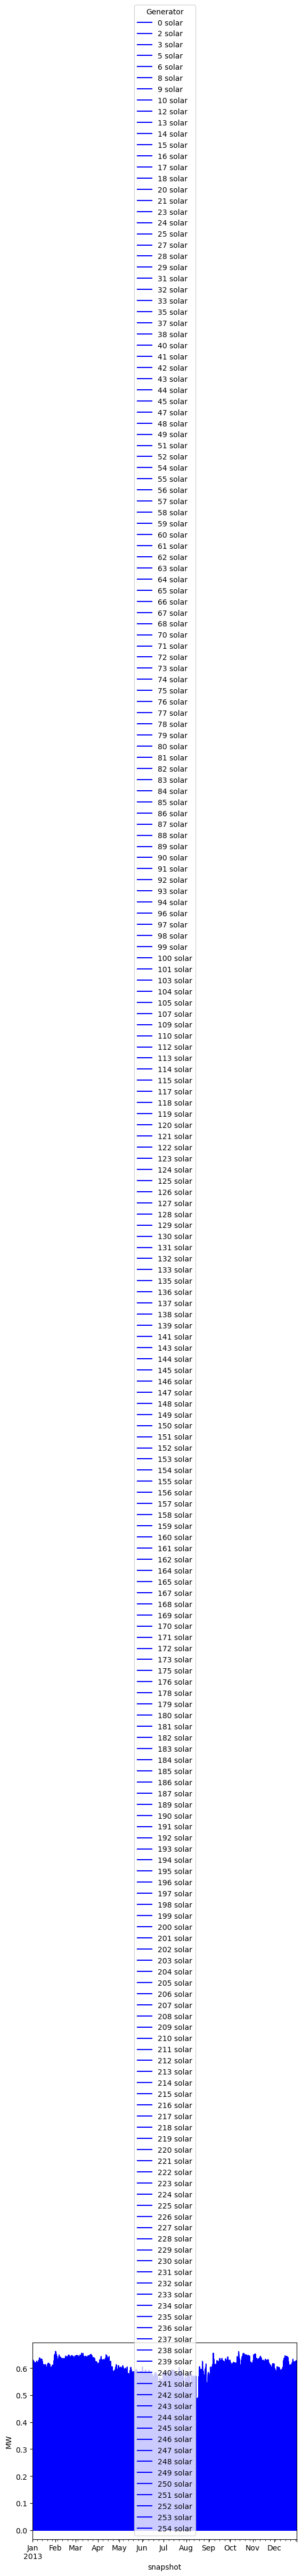

In [9]:
n.generators_t.p_set.plot(color='blue', ylabel='MW')

<AxesSubplot: xlabel='snapshot', ylabel='MW'>

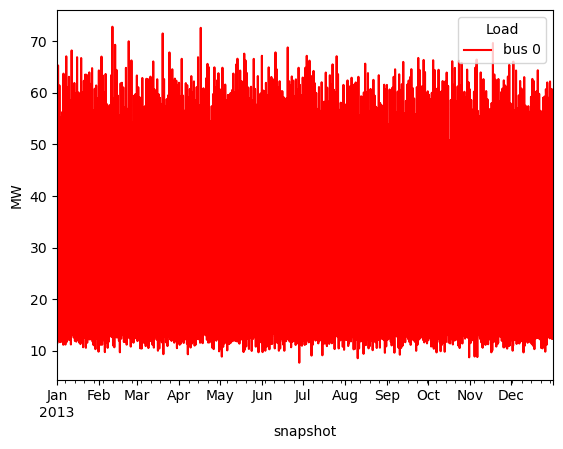

In [10]:
n.loads_t.p_set.plot(color='red', ylabel='MW')

In [11]:
#n.madd("StorageUnit", ["mySU"] , bus="onebus",, capital_cost=300)
n.madd("StorageUnit",["StorUni"], bus="onebus",  p_nom=0.5, marginal_cost=10, inflow=50, p_nom_extendable=True, capital_cost=50, 
       efficiency_dispatch=0.5, cyclic_state_of_charge=True, state_of_charge_initial=1000)

Index(['StorUni'], dtype='object')

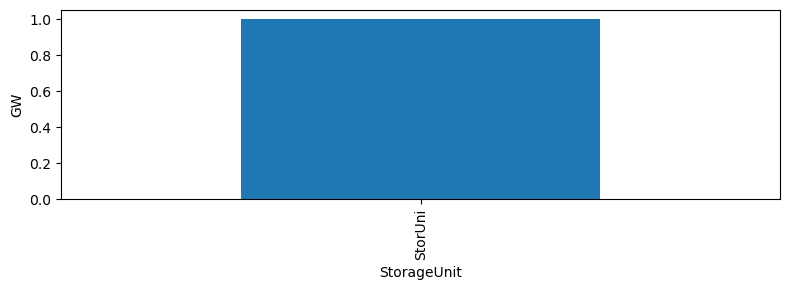

In [12]:
n.storage_units.state_of_charge_initial.div(1e3).plot.bar(ylabel="GW", figsize=(8, 3))
plt.tight_layout()

In [13]:
#Optimization
from pypsa.linopf import ilopf

solver_name="gurobi"

n.lopf(n.snapshots, solver_name=solver_name, pyomo=False)

INFO:pypsa.linopf:Prepare linear problem
INFO:pypsa.linopf:Total preparation time: 2.06s
INFO:pypsa.linopf:Solve linear problem using Gurobi solver


Set parameter Username
Academic license - for non-commercial use only - expires 2023-09-07
Read LP format model from file C:\Users\denis\AppData\Local\Temp\pypsa-problem-foxxhqcc.lp
Reading time = 0.42 seconds
obj: 87600 rows, 43803 columns, 170564 nonzeros
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 87600 rows, 43803 columns and 170564 nonzeros
Model fingerprint: 0x4ac37d3b
Coefficient statistics:
  Matrix range     [1e-02, 2e+00]
  Objective range  [1e-03, 4e+02]
  Bounds range     [5e+01, 1e+05]
  RHS range        [5e+01, 5e+01]

Concurrent LP optimizer: dual simplex and barrier
Showing barrier log only...

Presolve removed 53072 rows and 13397 columns
Presolve time: 0.44s
Presolved: 34528 rows, 30406 columns, 94824 nonzeros

Ordering time: 0.01s

Barrier statistics:
 Dense cols : 2
 AA' NZ     : 7.730e+04
 Factor NZ  : 4.490e+05 (roughly 30 MB of memory)
 Factor Ops : 6.783e

INFO:pypsa.linopf:Optimization successful. Objective value: -8.02e+03


('ok', 'optimal')

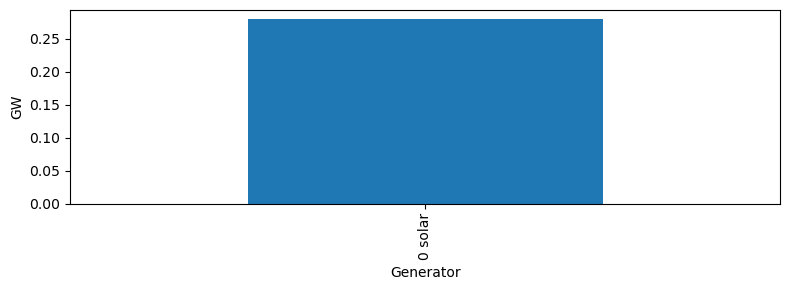

In [14]:
n.generators.p_nom_opt.div(1e3).plot.bar(ylabel="GW", figsize=(8, 3))
plt.tight_layout()

In [15]:
print(n.storage_units.p_nom_opt)

StorageUnit
StorUni    0.0
Name: p_nom_opt, dtype: float64


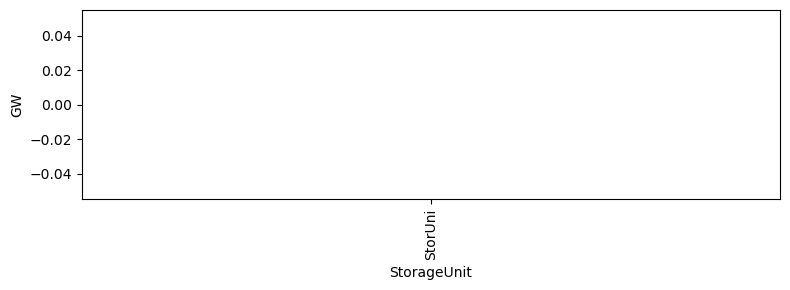

In [16]:
n.storage_units.p_nom_opt.div(1e3).plot.bar(ylabel="GW", figsize=(8, 3))
plt.tight_layout()

In [17]:
n.storage_units_t.keys()

dict_keys(['p_min_pu', 'p_max_pu', 'p_set', 'q_set', 'marginal_cost', 'state_of_charge_set', 'inflow', 'p', 'p_dispatch', 'p_store', 'q', 'state_of_charge', 'spill', 'mu_upper', 'mu_lower', 'mu_state_of_charge_set'])

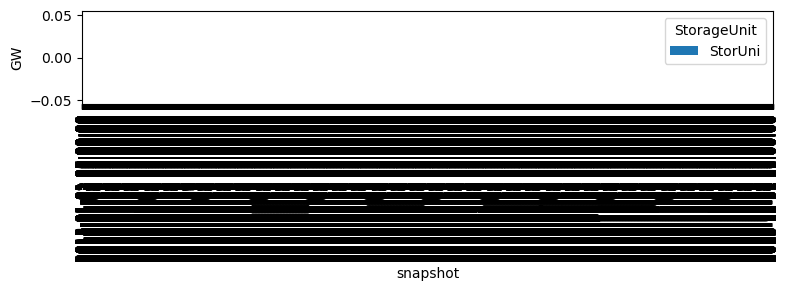

In [18]:
n.storage_units_t.state_of_charge.div(1e3).plot.bar(ylabel="GW", figsize=(8, 3))
plt.tight_layout()

In [19]:
n.storage_units

,bus,p_nom,marginal_cost,inflow,p_nom_extendable,capital_cost,efficiency_dispatch,cyclic_state_of_charge,state_of_charge_initial,control,...,carrier,build_year,lifetime,state_of_charge_initial_per_period,state_of_charge_set,cyclic_state_of_charge_per_period,max_hours,efficiency_store,standing_loss,p_nom_opt
StorageUnit,,,,,,,,,,,,,,,,,,,,,
StorUni,onebus,0.5,10.0,50.0,True,50.0,0.5,True,1000.0,PQ,...,,0,inf,False,NaN,True,1.0,1.0,0.0,0.0


In [20]:
n.iplot()

{'data': [{'x': Bus
   onebus    0.1
   Name: x, dtype: float64,
   'y': Bus
   onebus    0.2
   Name: y, dtype: float64,
   'text': Index(['Bus onebus'], dtype='object', name='Bus'),
   'type': 'scatter',
   'mode': 'markers',
   'hoverinfo': 'text',
   'opacity': 1,
   'marker': {'color': 'cadetblue', 'size': 10}}],
 'layout': {'title': '',
  'hovermode': 'closest',
  'showlegend': False,
  'shapes': []}}

In [21]:
n.buses

,x,y,carrier,v_nom,type,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,sub_network,generator
Bus,,,,,,,,,,,,
onebus,0.1,0.2,AC,20.0,,None,1.0,0.0,inf,Slack,0,0 solar


In [22]:
import yaml

data = {
    'extendable_carriers': {
        'Generator': '[solar, onwind, offwind-ac, offwind-dc, OCGT]',
        'StorageUnit': '[]',
        'Store': '[battery, H2]' ,
        'Link': '[]', # H2 pipeline
    }
}

with open('config.yaml', mode='w') as file:
    yaml.dump(data, file, indent=2)
type(data)

dict